# Klasifikasi Pengenalan Tulisan Tangan Dalam Bentuk Digit Dengan Metode Support Vector Machine

Nama   : Gita Cahyani

NIM    : 09011281924147

Kelas  : SK5B


In [8]:
from sklearn.datasets import fetch_openml
#berguna untuk mendownload datasets MNIST langsung secara online
X, y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y=True)
#Pada bagian ini kita memasukkan nama dari dataset yang akan di download melalui fetch_openml, data set yang akan di download adalah mnist_784
#Setelah nama dari dataset dimasukkan maka selanjutnya adalah melakukan spesifikasi lokasi pada lokal mesin untuk mendownload dataset (./dataset/mnist) 
#Kemudian pisahkan pictures dan target labelnya dengan memasukkan parameter return X, y yang berniali True
#Variable X berguna untuk menampung sekumpulan nilai pictures sedangkan variable y berguna untuk menampung nilai dari target labelnya
X.shape
#Digunakan untuk menampilkan dimensi dari data picturesnya

(70000, 784)

Nilai 70000 merupakan nilai pada jumlah baris, sedangkan nilai 784 merupakan nilai pada jumlah kolomnya

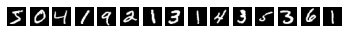

In [9]:
import matplotlib.pyplot as plt
#Digunakan untuk menampilkan data yang berbentuk gambar
import matplotlib.cm as cm
#cm merepresentasikan color map

pos = 1
for data in X[:15]:
#Digunakan untuk melakukan perulangan pada 15 data pertama pada variable X
    plt.subplot(1, 15, pos)
    plt.imshow(data.reshape((28, 28)),
    #data gambar yang ada akan di reshape ke dalam ukuran 28*28 piksel
              cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1


plt.show()

output diatas merupakan hasil keluaran pada 15 gambar data tulisan tangan pertama dalam bentuk pictures

In [10]:
y[:15]
#digunakan untuk menampilkan 15 label yang berkorelasi pada 15 data pertama 

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
       '6', '1'], dtype=object)

output diatas merupakan nilai dari target label, dan dikarenakan target label ini berupa angka maka jumlah classnya akan ada 10 yaitu mulai dari 0-9

In [11]:
X_train = X[:10000]
#Data X training yang digunakan merupakan 10000 dataset pertama
y_train = y[:10000]
#Data y training yang digunakan merupakan 10000 dataset pertama
X_test = X[69000:]
#Data X yang digunakan untuk melakukan testing merupakan 1000 data terakhir
y_test = y[69000:]
#Data y yang digunakan untuk melakukan testing merupakan 1000 data terakhir

Setelah dataset terbagi kedalam data training dan data testing, maka langkah selanjutnya adalah dengan melakuakan klasifikasi dengan menggunakan metode Support Vector Machine (SVM)

In [12]:
from sklearn.svm import SVC
#SVC (Support Vector Classifier), penginportan modul ini berguna untuk melakukan training model yang ada

model = SVC (random_state=0)
#digunakan untuk membentuk objek pada model (SVC) kemudian sertakan parameter pada model yaitu random_state yang bernilai 0
model.fit(X_train, y_train)
#digunakan untuk melakukan training pada model yang sudah terbentuk dengan memanggil method fit dan kemudian menyertakan training setnya

SVC(random_state=0)

setelah model selesai di training maka selanjutnya adalah melakukan evaluasi performa dengan menggunakan kode program di bawah ini

In [13]:
from sklearn.metrics import classification_report
#digunakan untuk melakukan evaluasi performa

y_pred = model.predict(X_test)
#testing set akan digunakan untuk melakuakn prediksi dan hasilnya akan ditampung ke dalam variabel y_pred
print(classification_report(y_test, y_pred))
#hasil dari nilai y_pred akan di bandingkan dengan nilai y_test, kemudian akan dicetak nilai dari classification_report nya

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       102
           1       1.00      1.00      1.00       119
           2       0.90      0.91      0.90        99
           3       0.99      0.98      0.99       102
           4       0.94      0.98      0.96        92
           5       0.97      0.89      0.93        85
           6       0.95      0.98      0.97       102
           7       0.96      0.95      0.95       115
           8       0.96      0.99      0.97        94
           9       0.99      0.92      0.95        90

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



Dari output program yang ditampilkan diatas kita bisa elihat nilai dari presisi, recall, f1-score, serta akurasi dari masing masing class yang ada secara keseluruhan

## Hyperparameter Tuning dengan GridSearchCV
Hyperparameter adalah parameter yang digunakan untuk mengatur proses training pada suatu model, sedangkan proses untuk mencari nilai komposisi optimum dari proses training disebut dengan Hyperparameter Tuning

In [14]:
#from sklearn.model_selection import GridSeacrhCV
from sklearn.model_selection import learning_curve, GridSearchCV

parameters = {
    'kernel' : ['rbf','poly','sigmoid'],
    'C' : [0.5, 1, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.01, 0.001]
}
#Kode program parameters diatas dilakukan untuk menspesifikasikan sekumpulan parameter beserta pilihan nilai yang akan dikombinasikan
#Parameter yang digunakan adalah kernel, C, dan gamma dengan nilai parameter yang telah dituliskan pada kode program

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                          param_grid=parameters,
                          n_jobs=4,
                           #number of jobs di set sebagai 2 artinya proses akan dijalankan secara parlel pada 2 Thread pada prosesor yang dimiliki 
                          verbose=1,
                          scoring='accuracy')
#Kode program diatas digunakan untuk mencari kombinasi nilai terbaik yang nantinya akan diterapkan terhadap objek suppor vector classifier pada kasus ini

grid_search.fit(X_train, y_train)
#Lakukan pemanggilan method fit melalui objek grid_search

print(f'Best Score : {grid_search.best_score_}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 18.9min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 89.8min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed: 150.8min finished


Best Score : 0.9667999999999999


In [15]:
print(f'Best Score: {grid_search.best_score_}')
#digunakan untuk menampilkan nilai score terbaik

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}:{best_params[param]}')
#digunakan untuk menampilkan nilai parameter terbaik yang akan di tampung ke dalam variabel best_params

Best Score: 0.9667999999999999
Best Parameters:
	kernel:rbf
	C:100
	gamma:scale


In [17]:
#melakukan evaluasi performa dari model yang baru di training
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       1.00      1.00      1.00       119
           2       0.91      0.95      0.93        99
           3       0.98      1.00      0.99       102
           4       0.96      0.99      0.97        92
           5       0.96      0.92      0.94        85
           6       0.97      0.98      0.98       102
           7       0.96      0.94      0.95       115
           8       0.98      0.99      0.98        94
           9       1.00      0.92      0.96        90

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

